### РАБОТА No 1. ТИПОВЫЕ РАДИОСИГНАЛЫ И ИХ СПЕКТРЫ

В данной лабораторной работе на модели определяются характери-
стики следующих сигналов:  
•  сигнала с гармонической амплитудной модуляцией (АМ);

•  сигнала с гармонической частотной модуляцией (ЧМ);
 
•  радиоимпульса с прямоугольной огибающей.

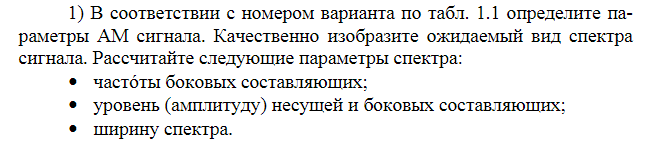

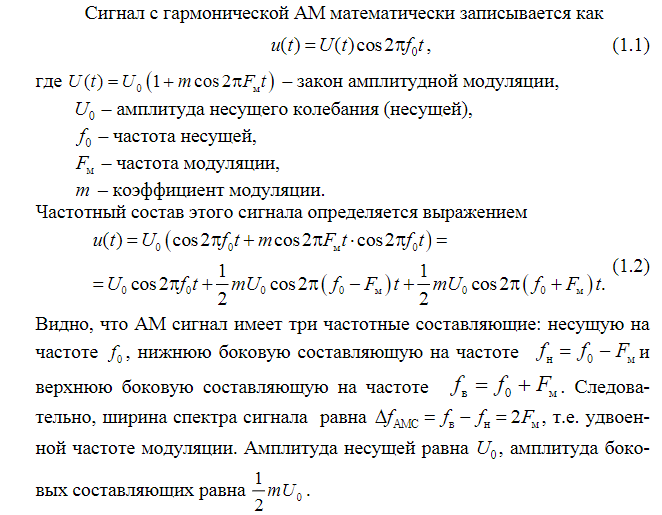

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy.special import jv  # Импорт функции Бесселя

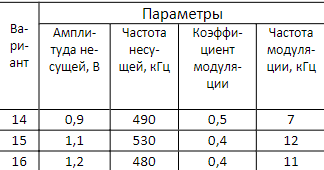

Амплитуда несущей: 1.1 В
Амплитуда боковых составляющих: 0.22000000000000003 В
Нижняя боковая частота: 518.0 кГц
Верхняя боковая частота: 542.0 кГц
Ширина спектра: 24.0 кГц


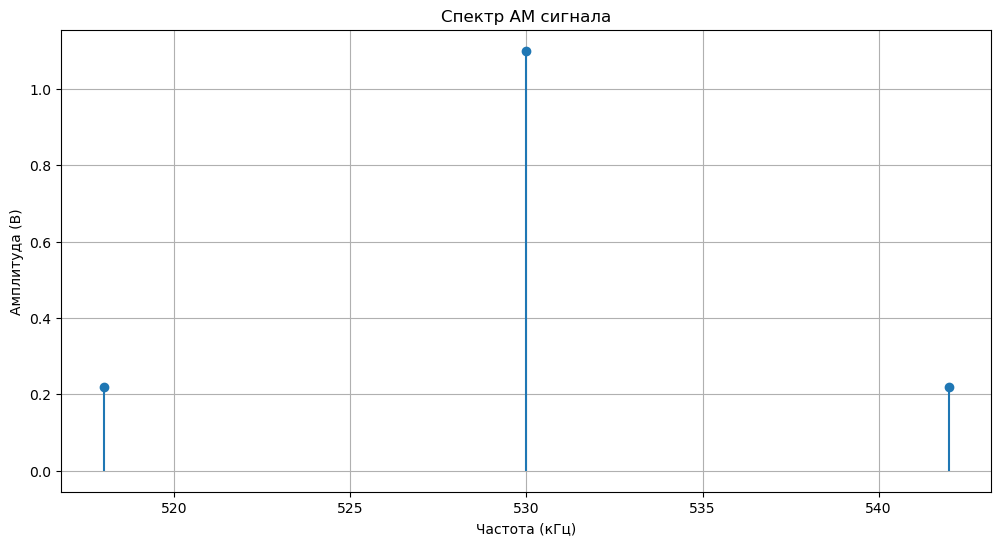

In [3]:
# Заданные параметры
U0 = 1.1  # Амплитуда несущего колебания
f0 = 530e3  # Частота несущей (480 кГц)
Fm = 12e3  # Частота модуляции (11 кГц)
m = 0.4  # Коэффициент модуляции


# Параметры спектра
carrier_amplitude = U0  # Амплитуда несущей
sideband_amplitude = m * U0 / 2  # Амплитуда боковых составляющих
lower_sideband_freq = f0 - Fm  # Нижняя боковая частота
upper_sideband_freq = f0 + Fm  # Верхняя боковая частота
spectrum_width = 2 * Fm  # Ширина спектра

# Вывод параметров
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq / 1e3} кГц")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Построение спектра
frequencies = [lower_sideband_freq, f0, upper_sideband_freq]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude]

plt.figure(figsize=(12, 6))

plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ")
plt.title("Спектр АМ сигнала")
plt.xlabel("Частота (кГц)")
plt.ylabel("Амплитуда (В)")
plt.grid(True)
plt.show()



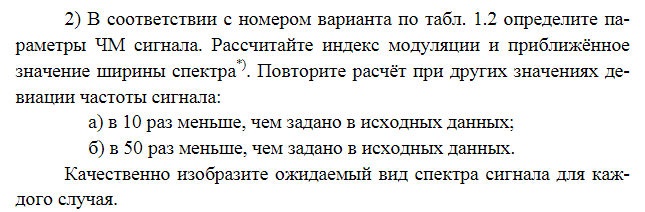

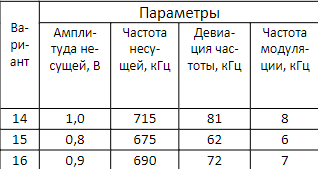

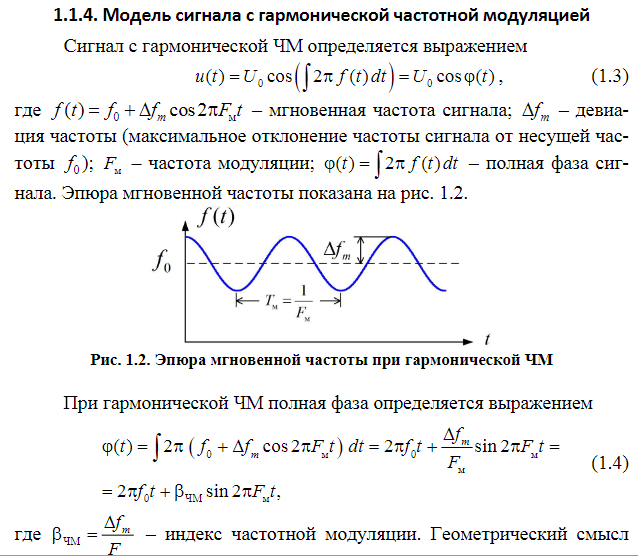
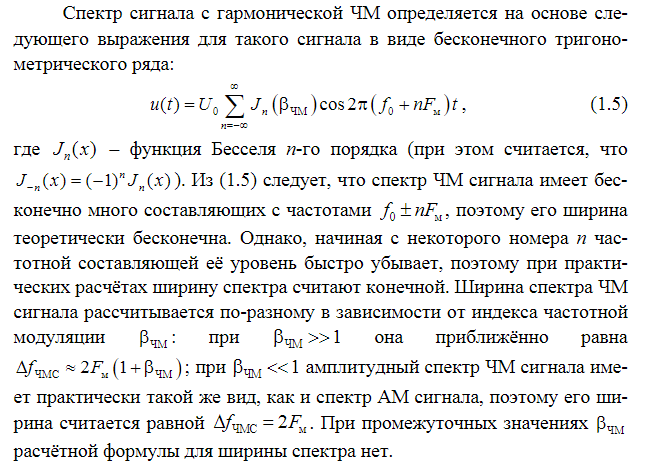

Исходные параметры:
Индекс модуляции (β): 10.333333333333334
Ширина спектра: 136.0 кГц

Случай а) Девиация в 10 раз меньше:
Индекс модуляции (β): 1.0333333333333334
Ширина спектра: 24.4 кГц

Случай б) Девиация в 50 раз меньше:
Индекс модуляции (β): 0.20666666666666667
Ширина спектра: 14.48 кГц


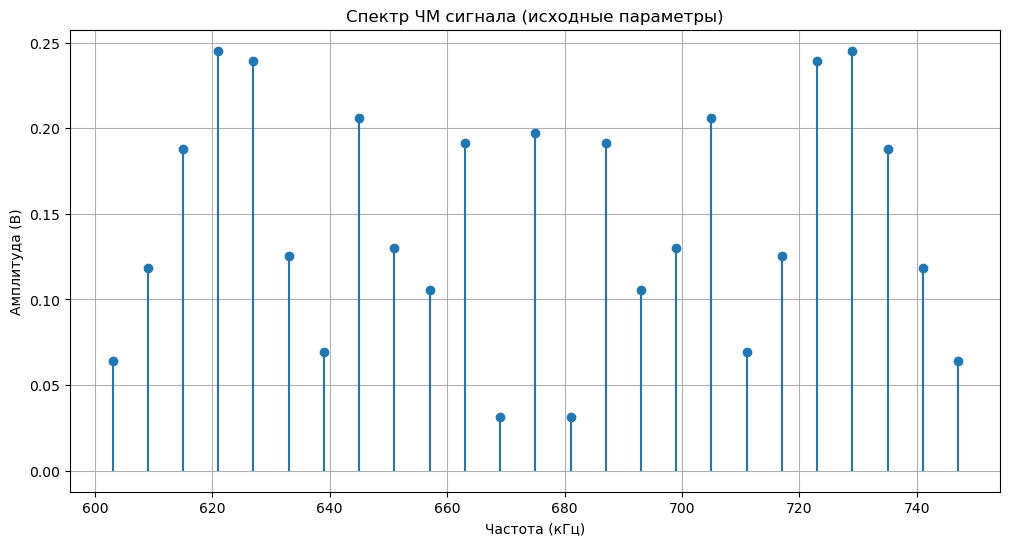

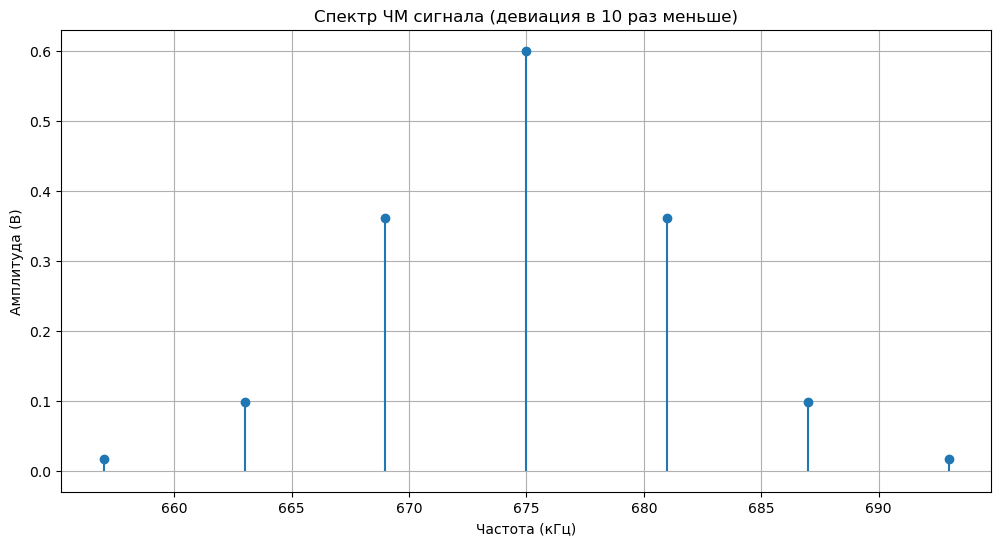

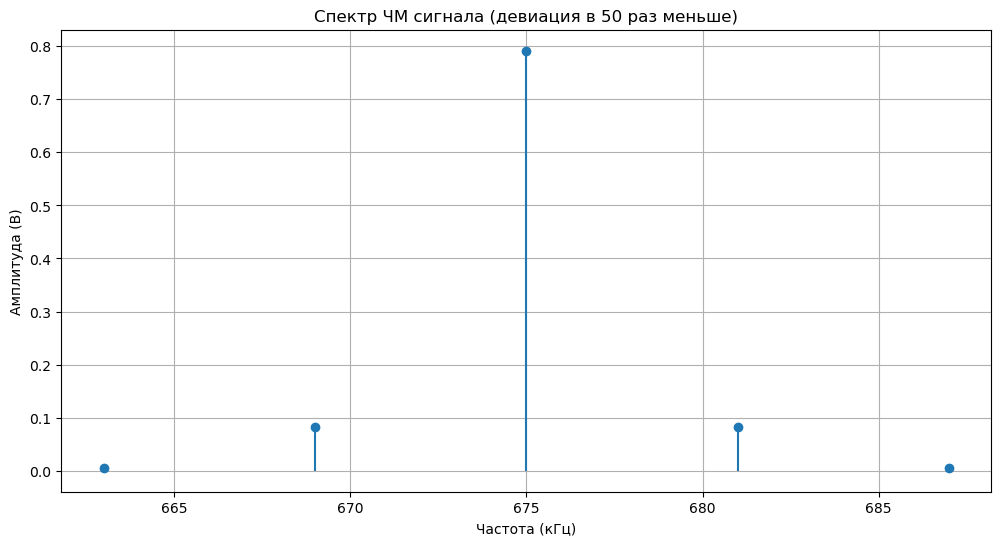

In [4]:
# Заданные параметры
U0 = 0.8 # Амплитуда несущего колебания
f0 = 675e3  # Частота несущей (690 кГц)
dev = 62e3  # Девиация частоты (72 кГц)
Fm = 6e3  # Частота модуляции (7 кГц)


# Функция для расчёта параметров
def calculate_fm_parameters(dev, Fm):
    beta = dev / Fm  # Индекс модуляции
    spectrum_width = 2 * (dev + Fm)  # Ширина спектра
    return beta, spectrum_width

# Исходные данные
beta, spectrum_width = calculate_fm_parameters(dev, Fm)
print(f"Исходные параметры:")
print(f"Индекс модуляции (β): {beta}")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Случай а) Девиация в 10 раз меньше
dev_a = dev / 10
beta_a, spectrum_width_a = calculate_fm_parameters(dev_a, Fm)
print(f"\nСлучай а) Девиация в 10 раз меньше:")
print(f"Индекс модуляции (β): {beta_a}")
print(f"Ширина спектра: {spectrum_width_a / 1e3} кГц")

# Случай б) Девиация в 50 раз меньше
dev_b = dev / 50
beta_b, spectrum_width_b = calculate_fm_parameters(dev_b, Fm)
print(f"\nСлучай б) Девиация в 50 раз меньше:")
print(f"Индекс модуляции (β): {beta_b}")
print(f"Ширина спектра: {spectrum_width_b / 1e3} кГц")

# Функция для построения спектра
def plot_spectrum(f0, Fm, beta, title):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies = [f0 + k * Fm for k in range(-n, n+1)]
    amplitudes = [U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ")
    plt.title(title)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.show()

# Построение спектров
plot_spectrum(f0, Fm, beta, "Спектр ЧМ сигнала (исходные параметры)")
plot_spectrum(f0, Fm, beta_a, "Спектр ЧМ сигнала (девиация в 10 раз меньше)")
plot_spectrum(f0, Fm, beta_b, "Спектр ЧМ сигнала (девиация в 50 раз меньше)")

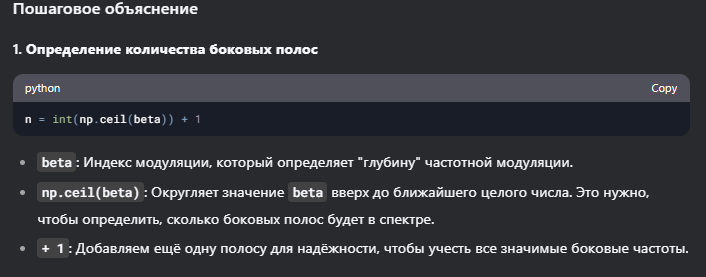
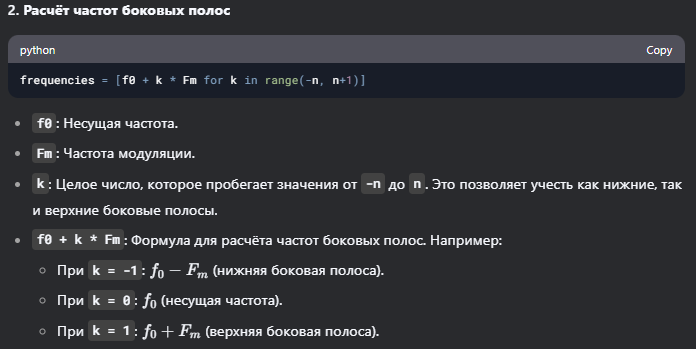
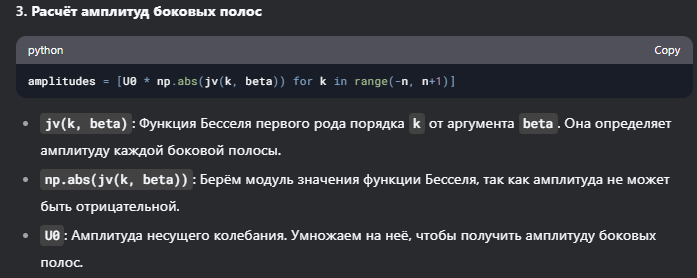
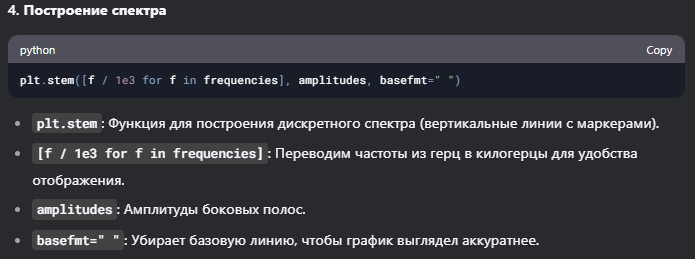

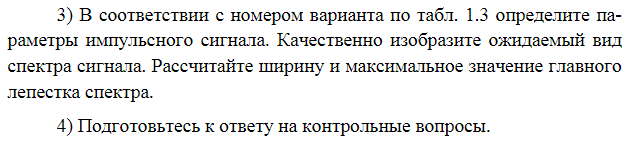
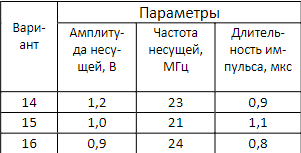

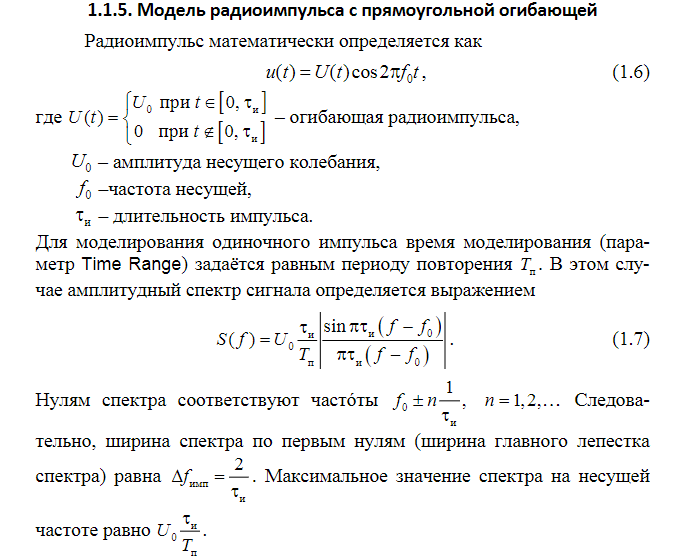

Максимальное значение спектра: 1.1e-06 В·с
Ширина главного лепестка: 1.8181818181818181 МГц


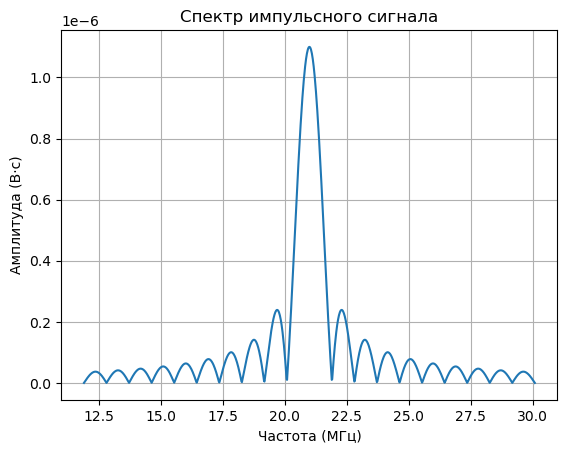

In [5]:
# Заданные параметры
U0 = 1.0  # Амплитуда несущего колебания
f0 = 21e6  # Частота несущей (24 МГц)
dlit = 1.1e-6  # Длительность импульса (0.8 мкс)

# Параметры спектра
max_amplitude = U0 * dlit  # Максимальное значение спектра
main_lobe_width = 2 / dlit  # Ширина главного лепестка

# Вывод параметров
print(f"Максимальное значение спектра: {max_amplitude} В·с")
print(f"Ширина главного лепестка: {main_lobe_width / 1e6} МГц")

# Функция для построения спектра
def plot_spectrum(f0, dlit, U0, title):
    # Диапазон частот для построения спектра
    f = np.linspace(f0 - 10 / dlit, f0 + 10 / dlit, 1000)  # Охватываем несколько лепестков
    # Спектр огибающей (sinc-функция)
    spectrum = U0 * dlit * np.abs(np.sinc((f - f0) * dlit))
    
    # Построение спектра
    plt.plot(f / 1e6, spectrum)  # Переводим частоты в МГц
    plt.title(title)
    plt.xlabel("Частота (МГц)")
    plt.ylabel("Амплитуда (В·с)")
    plt.grid(True)
    plt.show()

# Построение спектра
plot_spectrum(f0, dlit, U0, "Спектр импульсного сигнала")